errorneg_theta_ML 0.5858585858585865
errorpos_theta_ML 0.5858585858585859
38


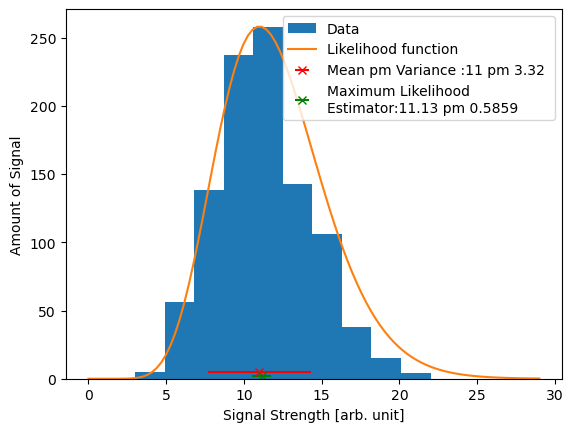

In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


lamda = 11
size = int(1e3)
#random variables
poisson_draws = poisson.rvs(mu=lamda, size=size)
x = np.arange(poisson.ppf(0.000001, lamda), poisson.ppf(0.999999, lamda))
max_,bins , _ = ax.hist(poisson_draws, label = "Data", )
xinter = np.linspace(x[0], x[-1], 100)
L =   poisson.pmf(k= lamda , mu= xinter, loc=0)
L = L/np.max(L) * max(max_)

theta_ML = np.where(L == np.max(L))[0][0]
errorpos_theta_ML =np.where(L[theta_ML:] <= (np.max(L) - 2)  )
errorpos_theta_ML =  xinter[errorpos_theta_ML[0][0]]

errorneg_theta_ML =np.where(L[:theta_ML] <= (np.max(L) - 2)  )
errorneg_theta_ML = xinter[theta_ML] - xinter[errorneg_theta_ML[0][-1]] 

print("errorneg_theta_ML", errorneg_theta_ML)
print("errorpos_theta_ML", errorpos_theta_ML)
print(theta_ML)
plt.errorbar(x = lamda, y = 5, 
             xerr = np.sqrt(lamda),
            fmt = 'x',color = 'red', label = f"Mean pm Variance :{lamda} pm {np.sqrt(lamda):.3} ")
plt.errorbar(x = xinter[theta_ML], y = 2, 
             xerr = (errorneg_theta_ML),
            fmt = 'x',color = 'green', 
             label = f"Maximum Likelihood \nEstimator:{xinter[theta_ML]:.4} pm {errorneg_theta_ML:.4}")
ax.plot(xinter,  L,
        label='Likelihood function')
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")

plt.legend()
plt.show()


In [2]:
def Gauss(bins, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

In [ ]:
mu, sigma = 0, 1 # mean and standard deviation

sys = np.random.normal(mu, sigma, size)

count, bins, ignored = plt.hist(sys, 99, density=True)
G = Gauss(bins, mu, sigma)
plt.plot(bins, G ,
         linewidth=2, color='r')

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1)
max_,bins , _ = plt.hist(sys+11, label = "sys", color = 'red' ,
                        alpha = 0.4)

ax.plot(xinter,  L, label='Likelihood function')
G = Gauss(xinter, lamda, sigma)
G = G/np.max(G) * np.max(max_)
print(G)
ax.plot(xinter, G, label='Prior')


plt.legend()
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")


In [ ]:
poisson.rvs(mu=lamda+sys[0], size=1)

In [ ]:
def L (theta, x ):
    l = []
    for xi in x:
        l.append( theta**xi * np.exp(-theta))
    return l

In [ ]:
l = L (theta= 10, x = range(30))
print(l)
plt.plot(range(30), l)

In [ ]:
fig, ax = plt.subplots(1, 1)

poisson_draws_sys = []
for i in range((size)):
    p = poisson.rvs(mu=lamda+sys[i], size=1)[0]
    poisson_draws_sys.append(p)

max_,bins , _ = plt.hist(poisson_draws_sys, label = "Data+sys", color = 'orange' ,
                        alpha = 0.9)
max_,bins , _ = plt.hist(poisson_draws, label = "Data",  color = 'tab:blue')
max_,bins , _ = plt.hist(sys+11, label = "sys", color = 'green' ,alpha = 0.99)

ax.plot(xinter,  L, label='Likelihood function')
G = Gauss(xinter, lamda, sigma)
G = G/np.max(G) * np.max(max_)
P = L* G 
P = P/np.max(P) * np.max(max_)
ax.plot(xinter, P, label='Posterior function')
ax.plot(xinter, G, label='Prior')
for i in range(30):
    prob = 

plt.legend()
plt.xlabel("Signal Strength [arb. unit]")
plt.ylabel("Amount of Signal")


In [ ]:
G

In [ ]:
import numpy as np

# Set the value of lambda
lam = 10

# Generate Poisson-distributed random numbers
poisson_data = np.random.poisson(lam, size=1000)

# Generate normally-distributed random numbers
gaussian_data = np.random.normal(size=1000)

# Add the two sets of random numbers together
simulated_data = poisson_data + gaussian_data

# Print the first 10 values of the simulated data
print(simulated_data[:10])
plt.hist(simulated_data)
plt.hist(poisson_data)
plt.hist(gaussian_data)